# 多項式曲線フィッティング (2)  過学習を防ぐ「正則化」項

<div style="text-align: right;">
    <a href="function_fitting2.ipynb">このページのオリジナルのipynbファイル</a>
</div>

"IPython Interactive Computing and Visualization Cookbook" (O'Reilly, 2018)のサンプルプログラム8.1を例に
（現在、原文はhttps://ipython-books.github.io/ にて閲覧できる。）

模式図はPRMLより。


## 2乗誤差最小化 (復習)

説明変数$x$に対する目的変数$y$について、$M$次関数でのフィッティングを考える：
$$
 y(x, {\bf w}) = w_0 + w_1 x + w_2 x^2 + \cdots + w_M x^M = \sum_{j=0}^{M} w_j x^j
$$
データ$\{(x_n, t_n)\}$ ($n=1,\cdots N$)があったときに、
2乗誤差
$$
E({\bf w}) = \frac{1}{2} \sum_{n=1}^N \{y(x_n,{\bf w}) - t_n\}^2
$$
を最小にするよう${\bf w}$を決める。



説明用に、PRMLに載っている図を載せておく。

最小２乗法の模式図：

<img src="http://8tops.yamanashi.ac.jp/~toyoki/labTips/dataScience/images/prmlfigs-png/Figure1.3.png" width="400">


$\sin$カーブにノイズを載せたテストデータをべき関数フィッティングしてみた例：次数$M$をが大きいほうが全データにあうフィッティングができるが、不自然であることがわかるだろう。($M$が次数)
<img src="http://8tops.yamanashi.ac.jp/~toyoki/labTips/dataScience/images/prmlfigs-png/Figure1.4a.png" width="400">
<img src="http://8tops.yamanashi.ac.jp/~toyoki/labTips/dataScience/images/prmlfigs-png/Figure1.4b.png" width="400">
<img src="http://8tops.yamanashi.ac.jp/~toyoki/labTips/dataScience/images/prmlfigs-png/Figure1.4c.png" width="400">
<img src="http://8tops.yamanashi.ac.jp/~toyoki/labTips/dataScience/images/prmlfigs-png/Figure1.4d.png" width="400">



## リッジ回帰

過学習を防ぐために、次のような係数に対する2次関数を付加し、その最小化を図る。この項は大きな係数の方が不利になるので、高次の項の「暴発」が抑えられる。

$$
\tilde{E}({\bf w}) = \frac{1}{2} \sum_{n=1}^N \{y(x_n,{\bf w}) - t_n\}^2 + \frac{\lambda}{2}||{\bf w}||^2
$$

これはリッジ回帰(ridge regression)を呼ばれる。ニューラルネットでは、過重減衰(weight decay)として知られている。

また、このことを正則化(regularization)と呼ぶ。

### リッジ回帰における重み係数

上記のPRMLの事例にある式で係数$\lambda$を固定して最小化を行った例($M=9$)：$\lambda$が大きいと加重がきつくフィッティングされにくくなる。リッジ回帰では$\lambda$を手入力で与える必要がある。（下で試すscikit-learnでは**alpha**という引数で指定）

<img src="http://8tops.yamanashi.ac.jp/~toyoki/labTips/dataScience/images/prmlfigs-png/Figure1.7a.png" width="400">
<img src="http://8tops.yamanashi.ac.jp/~toyoki/labTips/dataScience/images/prmlfigs-png/Figure1.7b.png" width="400">

### pythonスクリプトでの実例

#### サンプルデータの作成

まずは前回同様、サンプルデータを作っておく。 (sinカーブでなくてもよい）

ここでは、無名関数fを定義し、それにランダムデータを加える形でデータを作成してみる。

(注)

numpyのrandom.randn(n)はn個の正規分布乱数をリストとして出力してくれる。

フィッティング関数の次数=2
切片= 0.48313196254155294
係数= 0.002 -0.205 0.000
フィッティング関数の次数=5
切片= 1.525493575707999
係数= 0.057 -0.692 2.671 -3.138 -0.846 0.000
フィッティング関数の次数=10
切片= 1.328534433159252
係数= -0.003 0.060 -0.554 2.722 -7.483 11.051 -7.720 3.465 -4.209 0.821 0.000


(-2.0, 2.0)

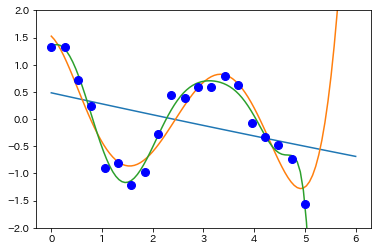

In [3]:
import numpy as np
import random
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

f_cos = lambda x: np.cos(2.0*x) # サンプルデータを作るためのベース関数

# データ数
n_tr = 20
x_max = 5.0 # xの範囲 [0, x_max]
x = np.linspace(0., x_max, n_tr)
y = f_cos(x) + np.random.randn(len(x))*0.3


# 単純な多項式近似
lrp = lm.LinearRegression()

for deg in [2,5,10]: # 最大べき
    power_matrix_x = np.vander(x, deg+1) # 計画行列の作成
    lrp.fit(power_matrix_x, y)
    # モデルの係数表示
    print('フィッティング関数の次数=' + str(deg))
    print('切片= ' + str(lrp.intercept_))
    print('係数= ' +  ' '. join(['%.3f' % c for c in lrp.coef_]))
    # 予測
    x_lrp = np.linspace(0., x_max*1.2, 100)
    y_lrp = lrp.predict(np.vander(x_lrp, deg+1))
    # 近似曲線の描画
    plt.plot(x_lrp, y_lrp)

# データの描画
plt.plot(x, y, "ob", ms=8)
plt.ylim(-2.0,2.0)

#### scikit-learnのリッジ回帰

マニュアルページ：
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


フィッティング関数の次数=2
切片= 0.4384266447149643
-0.00744  -0.15606  0.00000
フィッティング関数の次数=5
切片= 0.9101288226801906
0.00980  -0.14679  0.60775  -0.49492  -1.01123  0.00000
フィッティング関数の次数=10
切片= 1.1100008906771928
0.00050  -0.00942  0.06648  -0.19974  0.16152  0.24039  -0.03334  -0.37098  -0.57807  -0.57282  0.00000


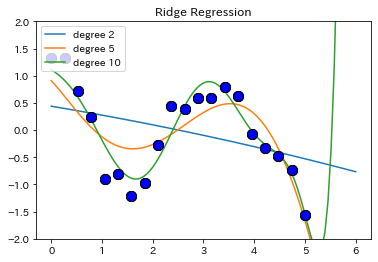

In [4]:

# リッジ回帰 alpha(正則化係数)の既定値は1.0 
ridge = lm.Ridge(alpha=1.0)

for deg in [2,5,10]: # 最大べき
    ridge.fit(np.vander(x, deg +1), y) # リッジ回帰
    # 予測
    x_lrp = np.linspace(0., x_max*1.2, 100)
    y_lrp = ridge.predict(np.vander(x_lrp, deg+1))
    plt.plot(x_lrp, y_lrp,
            label='degree ' + str(deg))
    plt.legend(loc=2)
    # モデルの係数表示
    print('フィッティング関数の次数=' + str(deg))
    print('切片= ' + str(ridge.intercept_))
    print('  '. join(['%.5f' % c for c in ridge.coef_]))
    plt.plot(x, y , 'ok', ms=10)
    plt.title('Ridge Regression')

# サンプルデータのプロット
plt.ylim(-2.0,2.0)
plt.plot(x, y, "ob", ms=8)

#### Lasso回帰

ウェイトの項を単に絶対値$\frac{\lambda}{2}||{\bf w}||$にしたものをlasso回帰と呼ぶ。


フィッティング関数の次数=2
切片= 1.328534433159252
係数-0.00781 -0.15329 0.00000
フィッティング関数の次数=5
切片= 1.328534433159252
係数-0.00302 -0.00681 0.07253 0.43024 -1.86808 0.00000
フィッティング関数の次数=10
切片= 1.328534433159252
係数0.00000 -0.00001 -0.00003 -0.00014 -0.00058 -0.00136 0.00547 0.09690 0.36810 -2.04308 0.00000


/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5831544566500413, tolerance: 0.0013460881585131905
  positive)
/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.024045194988752, tolerance: 0.0013460881585131905
  positive)


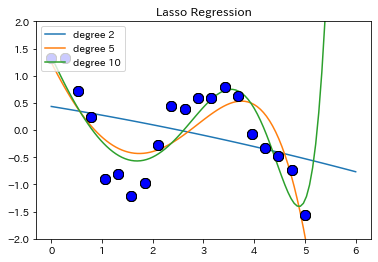

In [6]:
model = lm.Lasso(alpha=0.01)
for deg in [2,5,10]: # 最大べき
    model.fit(np.vander(x, deg +1), y) # リッジ回帰
    # 予測
    x_lrp = np.linspace(0., x_max*1.2, 100)
    y_lrp = model.predict(np.vander(x_lrp, deg+1))
    plt.plot(x_lrp, y_lrp,
            label='degree ' + str(deg))
    plt.legend(loc=2)
    # モデルの係数表示
    # モデルの係数表示
    print('フィッティング関数の次数=' + str(deg))
    print('切片= ' + str(lrp.intercept_))
    print('係数' + ' '. join(['%.5f' % c for c in model.coef_]))
    plt.plot(x, y , 'ok', ms=10)
    plt.title('Lasso Regression')

# サンプルデータのプロット
plt.ylim(-2.0,2.0)
plt.plot(x, y, "ob", ms=8)

Lassoの場合、この程度のばらつきの場合だと、既定の加重係数(alpha=1.0)は大きすぎるようだ。また、データ数を多くしないと収束がわるという警告がでる。


全体として、次数を上げた場合、加重を含む最適化を行っているため、過学習が抑えられている。

係数alpha (上の式では$\lambda$)は外からあたえるパラメータであり、**ハイパーパラメータ**と呼ばれる。

### 演習

データ作成のベース関数やデータ数、ハイパーパラメータ(正則化係数alphaやフィッティング関数の次数)を変えて振る舞いを確かめてみよう。

## 補足 : 外れ値について

極端な外れ値を含む場合は、別の対応が必要である。

参考：scikit-learnの事例より

https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html#sphx-glr-auto-examples-linear-model-plot-huber-vs-ridge-py
